**Check the Tensorflow version**

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


**Import required Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

**Load the CIFAR-10 Dataset from keras**

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Split them into train & test
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

170500096/170498071 [==============================] - 4s 0us/step


**Check the shape**

Train: x_train=(50000, 32, 32, 3), y_train=(50000,)
Test: x_test=(10000, 32, 32, 3), y_test=(10000,)


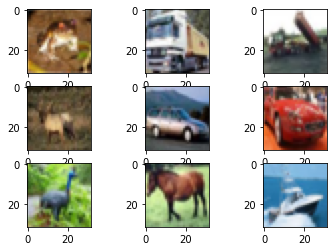

In [ ]:
# summarize loaded dataset
print('Train: x_train=%s, y_train=%s' % (x_train.shape, y_train.shape))
print('Test: x_test=%s, y_test=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i])
# show the figure
plt.show()

**Check the number of classes in dataset**

In [ ]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


**Build the Model**

In [ ]:
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

**We did Batch Normalization, See this to understand easily**

In [ ]:
# Note: make sure you are using the GPU for this.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**It's time to Training**

In [ ]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

# evaluation on test set
_,acc=model.evaluate(x_test,y_test)
print(acc*100)

Epoch 1/50
1563/1563 [==============================] - 17s 6ms/step - loss: 1.6978 - accuracy: 0.4578 - val_loss: 1.0479 - val_accuracy: 0.6303
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8656 - accuracy: 0.7015 - val_loss: 0.7970 - val_accuracy: 0.7335
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6977 - accuracy: 0.7610 - val_loss: 0.9717 - val_accuracy: 0.6979
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5711 - accuracy: 0.8065 - val_loss: 0.7394 - val_accuracy: 0.7615
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4803 - accuracy: 0.8331 - val_loss: 0.6390 - val_accuracy: 0.7932
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4061 - accuracy: 0.8576 - val_loss: 0.6981 - val_accuracy: 0.7722
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3381 - accuracy: 0.8843 - val_loss: 0.7518 - val_accuracy

**Retrain data with augmentation**

Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off.

In [ ]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

# evaluation on test set
_,acc=model.evaluate(x_test,y_test)
print(acc*100)

Epoch 1/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.5421 - accuracy: 0.8267 - val_loss: 0.5247 - val_accuracy: 0.8302
Epoch 2/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.4359 - accuracy: 0.8565 - val_loss: 0.4840 - val_accuracy: 0.8402
Epoch 3/50
1562/1562 [==============================] - 27s 18ms/step - loss: 0.4009 - accuracy: 0.8672 - val_loss: 0.5173 - val_accuracy: 0.8364
Epoch 4/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.3822 - accuracy: 0.8738 - val_loss: 0.4697 - val_accuracy: 0.8521
Epoch 5/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.3660 - accuracy: 0.8777 - val_loss: 0.4609 - val_accuracy: 0.8494
Epoch 6/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.3476 - accuracy: 0.8846 - val_loss: 0.4773 - val_accuracy: 0.8501
Epoch 7/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.3351 - accuracy: 0.8876 - val_loss: 0.4654 -

**Save model**

In [ ]:
# save model
model.save('final_model_improv3.h5')
# evaluate model
_, acc = model.evaluate(x_test, y_test)
print('> %.3f' % (acc * 100.0))

!cp final_model_improv3.h5 '/content/drive/MyDrive/WorkPlace/CS2225/image-classification/model'

313/313 [==============================] - 1s 3ms/step - loss: 0.4781 - accuracy: 0.8786
> 87.860


**Let's plot Loss**

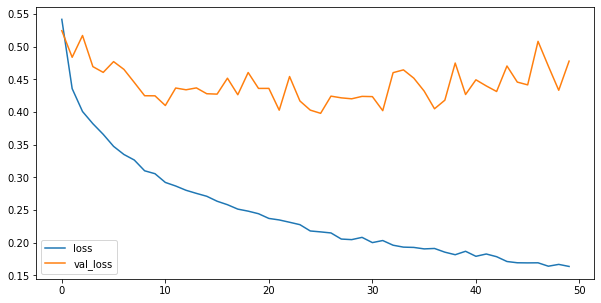

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,5]
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

**Let's plot Accuracy**

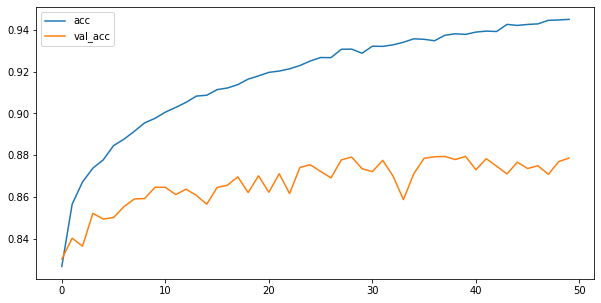

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

**Now plot the confusion matrix**

Confusion matrix, without normalization
[[861  16  23   8  14   2   5   4  34  33]
 [  2 946   0   1   1   0   2   1   5  42]
 [ 28   0 831  17  52  16  37  12   4   3]
 [ 12   6  42 709  50  87  59  15   8  12]
 [  4   1  22  10 921   7  17  15   1   2]
 [  2   2  30  97  37 783  20  21   3   5]
 [  2   3  19  11  16   5 937   2   2   3]
 [  2   1  18  11  26  23   3 911   1   4]
 [ 12  12   7   3   1   3   2   1 940  19]
 [  5  31   4   1   1   1   2   0   8 947]]


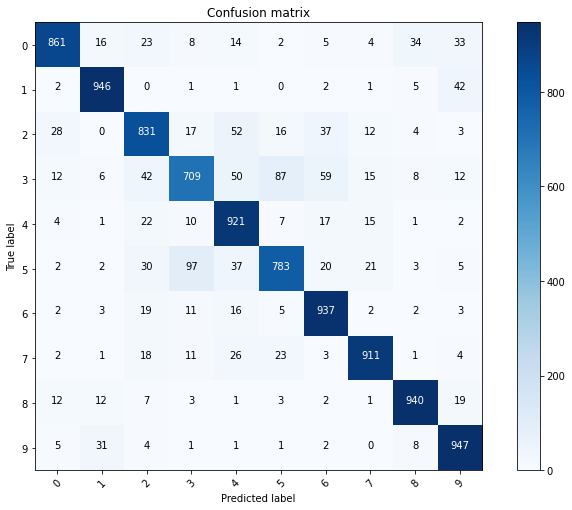

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1000
           1       0.93      0.95      0.94      1000
           2       0.83      0.83      0.83      1000
           3       0.82      0.71      0.76      1000
           4       0.82      0.92      0.87      1000
           5       0.84      0.78      0.81      1000
           6       0.86      0.94      0.90      1000
           7       0.93      0.91      0.92      1000
           8       0.93      0.94      0.94      1000
           9       0.89      0.95      0.91      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
plt.rcParams['figure.figsize'] = [10,7]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Calculate Precision, Recall, F1, and More for Deep Learning Models
from sklearn.metrics import f1_score
f1_score(y_test, p_test, average=None)

from sklearn.metrics import classification_report
print(classification_report(y_test, p_test))


**Define the Labels**

In [ ]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

**Check the Right predictions**

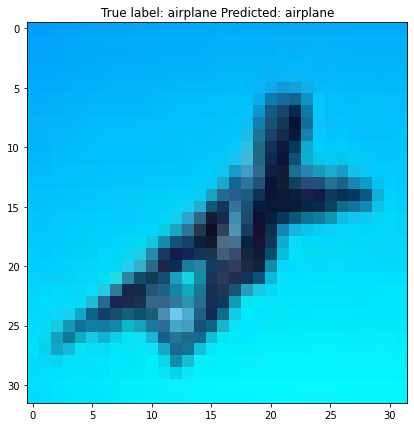

In [ ]:
misclassified_idx = np.where(p_test == y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));


**Check the wrong predictions**

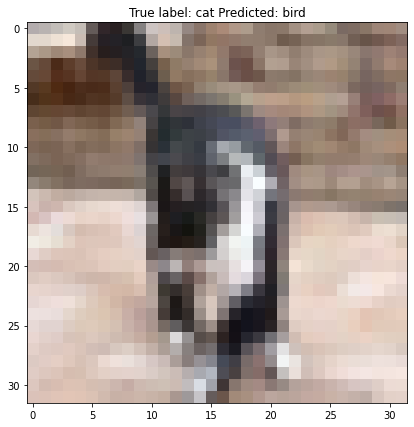

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

**Check the model summary**

In [ ]:
# Now that the model is so large, it's useful to summarize it
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Check Data**

In [ ]:
#load the trained model to classify the images
_DIR = '/content/drive/MyDrive/WorkPlace/CS2225/image-classification'
from keras.models import load_model
model = load_model(_DIR + '/model/final_model_improv3.h5')

from PIL import Image
import numpy as np
im=Image.open(_DIR + "/sampletest/airplane1.jpg")

# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
#pred=model.predict_classes([im])[0]
pred=np.argmax(model.predict(im)[0], axis=-1)
print(pred,labels[pred])


0 airplane
